<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

Movimiento sobreamortiguado ($\zeta>1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
Críticamente amortiguado ($\zeta = 1$).
Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente.
Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

$$\frac{dx_1}{dt}=x_2$$
$$\frac{dx_2}{dt}=c -2\zeta\omega_n x_2-\omega_n^2 x_1 
$$
donde $c=\frac{1}{m } F_0 \sin(\omega t)$


$$\begin{eqnarray*}
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = & \begin{bmatrix}
0 & 1 \\
-w_n^2 & -2\zeta w_n \\
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}+\begin{bmatrix}
0\\
c\\
\end{bmatrix}
\end{eqnarray*}$$

# Paquetes

In [ ]:
import numpy as np
import scipy.linalg as la
from scipy import integrate, linalg
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

#Problema1.

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0)< 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:
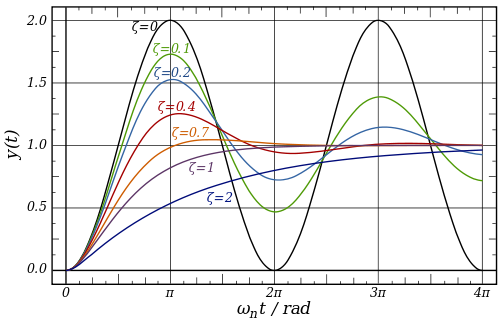

$$\frac{dx_1}{dt}=x_2$$
$$
\frac{dx_2}{dt}=c-2\zeta\omega_n x_2-\omega_n^2 x_1 
$$

donde $c=\frac{1}{m } F_0 \sin(\omega t)$

como $F_0=0$, entonces $c=0$

$$\begin{eqnarray*}
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = & \begin{bmatrix}
0 & 1 \\
-w_n^2 & -2\zeta w_n \\
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{eqnarray*}$$

$$\omega_n = \sqrt{\frac{9}{1}}$$
$$\omega_n = 3$$
y $\zeta$ es la tasa de amortiguamiento [0,0.1,0.2,0.4,0.7,1,2]

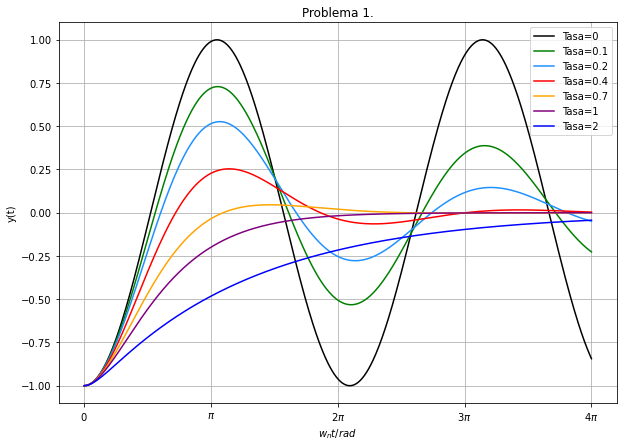

In [ ]:
# Constantes
tasas=[0,0.1,0.2,0.4,0.7,1,2]
m=1.
k=9.
wn=3.
colores=['k','g','dodgerblue','r','orange','purple','blue']
# Funcion
def f(y, t, tasa, wn):
    x, x1 = y
    x2 = -(wn**2)*x-2*tasa*wn*x1
    return [x1, x2]
# Tiempo
ti=0
tf=4
t=np.linspace(ti,tf,500) 
# Condiciones iniciales
t0=0
y0=[-1.,0.]
plt.figure(figsize=(10,7))
# Se soluciona y grafica para cada tasa
for ta,co in zip(tasas,colores):
  sol=odeint(f,y0,t,args=(ta,wn))
  plt.plot(t, sol[:,0],color=co, label='Tasa='+str(ta))
  plt.grid()
  plt.title("Problema 1.")
  plt.xlabel('$w_n t/rad$')
  plt.ylabel('y(t)')
  pl.xticks([0, 1, 2,3,4],[r'$0$', r'$\pi$', r'$2\pi$',r'$3\pi$',r'$4\pi$'])
  #pl.ylim(C.min() * 1.1, C.max() * 1.1)
  #pl.yticks([-1, +1],[r'$-1$', r'$+1$'])
  plt.legend()

#Problema2.

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$
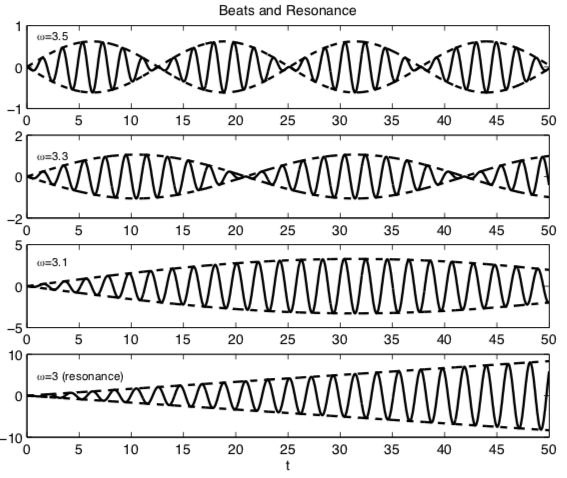

$$\frac{dx_1}{dt}=x_2$$
$$
\frac{dx_2}{dt}=\frac{1}{m } F_0 \sin(\omega t)-\omega_n^2 x_1 
$$


$$\begin{eqnarray*}
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = & \begin{bmatrix}
0 & 1 \\
-w_n^2 & 0 \\
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{eqnarray*}+\begin{bmatrix}
0\\
\frac{1}{m } F_0 \sin(\omega t)\\
\end{bmatrix}$$

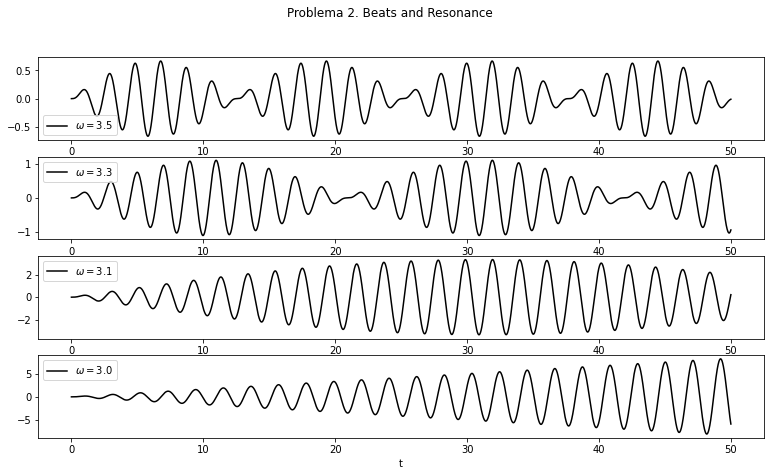

In [ ]:
# Constantes
frecuencias=[3.5,3.3,3.1,3.0]
F0=1.
m=1.
wn=3. #k=9. , wm=sqrt(k/m)
# Funcion
def f(y,t,w,wn):
    x, dxdt = y
    dydt = -(wn**2)*x+np.sin(w*t)
    return [dxdt, dydt]
# Tiempo
ti=0
tf=50
t=np.linspace(ti,tf,10000) 
# Condiciones iniciales
t0=0
y0=[0.,0.]
# Se soluciona y grafica para cada tasa
fig,axs=plt.subplots(4)
fig.suptitle('Problema 2. Beats and Resonance')
fig.set_figwidth(13)
fig.set_figheight(7)
for w,n in zip(frecuencias,range(4)):
#  plt.figure(figsize=(12,2))
  sol=odeint(f,y0,t,args=(w,wn))
  axs[n].plot(t, sol[:,0],color="K", label='$\omega=$'+str(w))
  axs[n].legend(loc='best')
  plt.grid()
plt.xlabel('t')
plt.legend()

# Problema 3.

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

$$\begin{eqnarray*}
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix} = & \begin{bmatrix}
0 & 1 \\
-w_n^2 & -2\zeta w_n \\
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}+\begin{bmatrix}
0\\
\frac{1}{m } F_0 \sin(\omega t)\\
\end{bmatrix}
\end{eqnarray*}$$

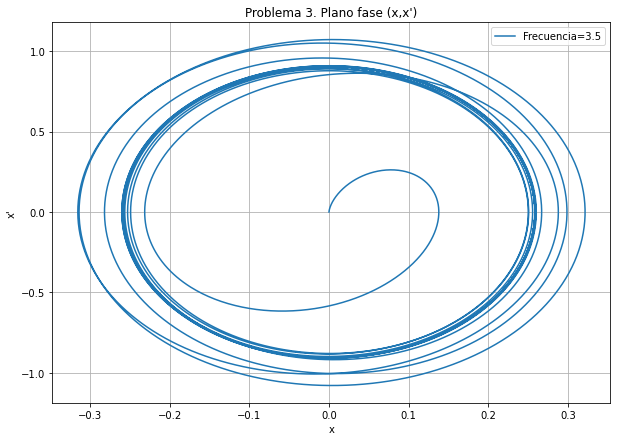

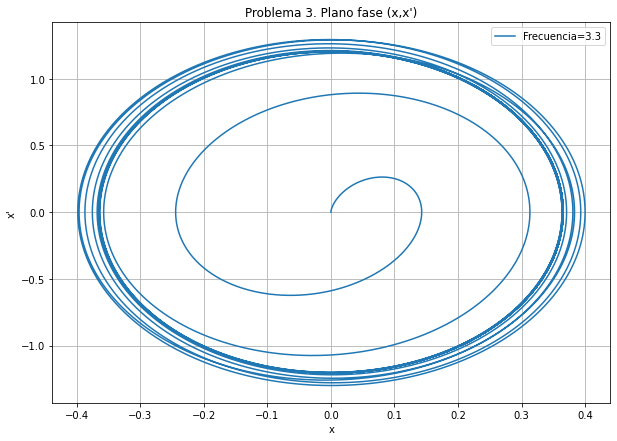

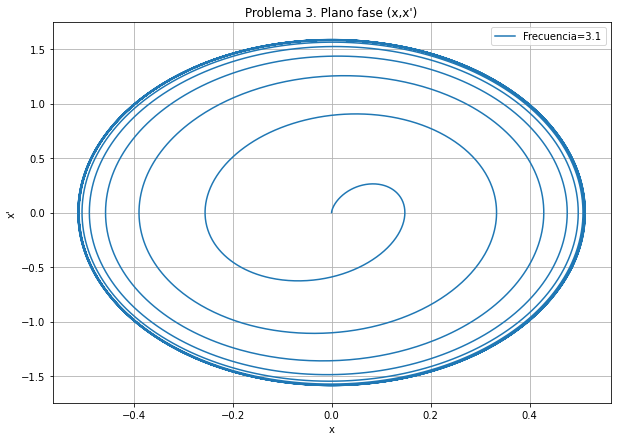

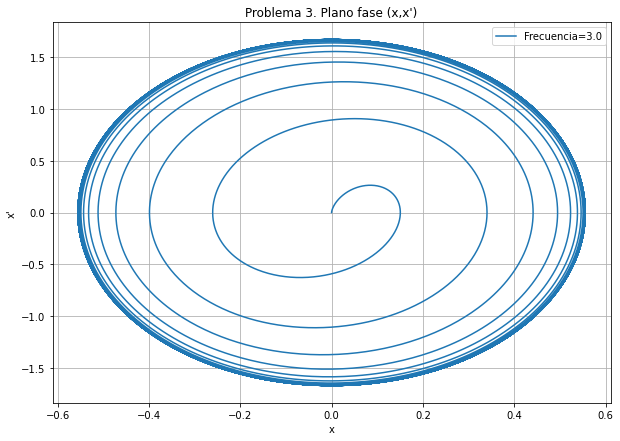

In [ ]:
# Constantes
frecuencias=[3.5,3.3,3.1,3.0]
tasas=0.1
m=1.
k=9.
F0=1.
m=1.
wn=3. #k=9. , wm=sqrt(k/m)
# Funcion
def f(y,t,w,wn):
    x, x1 = y
    x2 = -(wn**2)*x-2*0.1*wn*x1+np.sin(w*t)
    return [x1, x2]
# Tiempo
ti=0
tf=50
t=np.linspace(ti,tf,10000) 
# Condiciones iniciales
t0=0
y0=[0.,0.]
# Se soluciona y grafica para cada tasa
for w in frecuencias:
  plt.figure(figsize=(10,7))
  sol=odeint(f,y0,t,args=(w,wn))
  plt.plot(sol[:,0], sol[:,1], label='Frecuencia='+str(w))
  plt.grid()
  plt.title("Problema 3. Plano fase (x,x')")
  plt.xlabel('x')
  plt.ylabel('x\'')
  plt.legend()

Text(0.5, 1.0, "Problema 3. Plano fase (x,x') todas las frecuencias en 1 grafica")

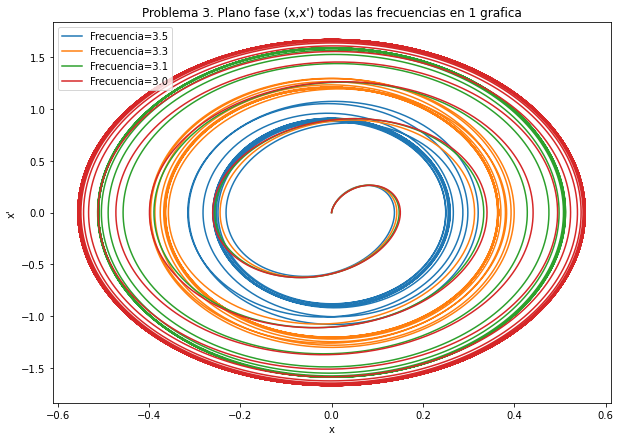

In [ ]:
plt.figure(figsize=(10,7))
for w in frecuencias:
  sol=odeint(f,y0,t,args=(w,wn))
  plt.plot(sol[:,0], sol[:,1], label='Frecuencia='+str(w))
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('x\'')
  plt.legend()
plt.title("Problema 3. Plano fase (x,x') todas las frecuencias en 1 grafica")